# 652 Week 1 Tips and Tricks #

Jamie White 

Revision: [ F2021 23 Aug 2021 ]

## Before starting your assignments... ##

... make a clean copy of your notebook in case you have to start over.

In Coursera:

`File > Make a copy...`

## Don't overload the autograder ###

Some cells take quite a while to compute. Work on one problem at a time, comment out other cells until you're read to submit.  Make sure your notebook runs, however.

```
Kernel -> Restart & Run All

```

## Load some libraries to get started... ##

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Make a graph (from 652 W1 tutorial) ###

In [2]:
G = nx.Graph()
G.add_node(1) # add a single node
G.add_nodes_from([2, 3, 4, 5, 6, 7, 8, 9, 0]) # add a list of nodes

In [12]:
G.add_edge(1, 2) # add a single edge
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3,5), 
                  (3, 7), (4,8), (5,9),(5,0),(6,0),(7,8),(8,9)]) 
# G.remove_edge(1, 2)

### User `dir` to find methods and attributes of any function ###

Maxim: When in doubt, `dir`

In [4]:
type(G)

networkx.classes.graph.Graph

In [3]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

### Reminder: NetworkX methods vs attributes ###

In [13]:
# method
nx.degree_centrality(G)
# not G.degree_centrality

{1: 0.2222222222222222,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.4444444444444444,
 6: 0.1111111111111111,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.2222222222222222,
 0: 0.2222222222222222}

In [9]:
nx.degree_centrality?

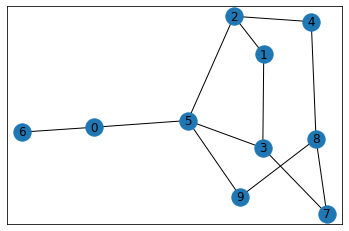

In [14]:
# method
nx.draw_networkx(G)

In [15]:
# attibute
G.edges

EdgeView([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (3, 7), (4, 8), (5, 9), (5, 0), (6, 0), (7, 8), (8, 9)])

___

## Graph analysis and sorting of dictionary values ###

Many functions return dictionaries. The 652 Assignments often require sorting of dictionary items based on value.

☞ Different sorting methods are equally valid, but ties may be resolved differently depending on method. **The autograder is very particular about exact answers, so use the recommended hint.**


>Hint: you can sort a dictionary `D` by its values using 
>
>```python
>sorted(D.items(), key=lambda item: item[1])
>```

In [16]:
D = nx.degree_centrality(G)
D

{1: 0.2222222222222222,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.4444444444444444,
 6: 0.1111111111111111,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.2222222222222222,
 0: 0.2222222222222222}

### Do this... ###

In [26]:
D_sorted = sorted(D.items(), key=lambda item: item[1])
D_sorted

[(6, 0.1111111111111111),
 (1, 0.2222222222222222),
 (4, 0.2222222222222222),
 (7, 0.2222222222222222),
 (9, 0.2222222222222222),
 (0, 0.2222222222222222),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (5, 0.4444444444444444)]

In [27]:
# recall: reverse slicing of lists
N    = 5
topN = D_sorted[::-1][:N]
topN

[(5, 0.4444444444444444),
 (8, 0.3333333333333333),
 (3, 0.3333333333333333),
 (2, 0.3333333333333333),
 (0, 0.2222222222222222)]

In [28]:
topN_nodes = [n for n,dc in topN]
topN_nodes

[5, 8, 3, 2, 0]

### ...don't do this... ###

In [30]:
D_sorted_rev = sorted(D.items(), key=lambda item: item[1], reverse=True)
D_sorted_rev

[(5, 0.4444444444444444),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (1, 0.2222222222222222),
 (4, 0.2222222222222222),
 (7, 0.2222222222222222),
 (9, 0.2222222222222222),
 (0, 0.2222222222222222),
 (6, 0.1111111111111111)]

In [35]:
N = 5
[(n,dc) for n,dc in D_sorted_rev][:N]

[(5, 0.4444444444444444),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (1, 0.2222222222222222)]

In [31]:
N = 5
topN_nodes_rev = [n for n,dc in D_sorted_rev][:N]
topN_nodes_rev

[5, 2, 3, 8, 1]

### ...because ###

In [32]:
set(topN_nodes) == set(topN_nodes_rev)

False

### ...and don't do this, either... ###

In [36]:
D_sorted_alt1 = sorted([(v,k) for k,v in D.items()])
D_sorted_alt1

[(0.1111111111111111, 6),
 (0.2222222222222222, 0),
 (0.2222222222222222, 1),
 (0.2222222222222222, 4),
 (0.2222222222222222, 7),
 (0.2222222222222222, 9),
 (0.3333333333333333, 2),
 (0.3333333333333333, 3),
 (0.3333333333333333, 8),
 (0.4444444444444444, 5)]

In [38]:
N               = 5
N_slice         = N-1
topN_alt1       = D_sorted_alt1[:N_slice:-1]
topN_alt1

[(0.4444444444444444, 5),
 (0.3333333333333333, 8),
 (0.3333333333333333, 3),
 (0.3333333333333333, 2),
 (0.2222222222222222, 9)]

In [39]:
topN_nodes_alt1 = [n for dc,n in topN_alt1]
topN_nodes_alt1

[5, 8, 3, 2, 9]

### ...because ###

In [40]:
# both sorts are valid, but ties are different
set(topN_nodes) == set(topN_nodes_alt1)

False

### More Do's ###

In [41]:
D_max_value = D_sorted[-1]
D_max_value

(5, 0.4444444444444444)

In [42]:
# value (degree centrality in this case)
D_max_value[1]

0.4444444444444444

In [43]:
# node with max value
D_max_value[0]

5

In [44]:
D_max_alt1 = max(D_sorted_alt1)
D_max_alt1

(0.4444444444444444, 5)

In [46]:
D_max_value_alt1 = D_max_alt1[0]

___

## Random seeds  ##

### `random()`, not `np.random()` ###

Be sure to set your random seed.

Not all randoms are random.  Use the bultin python `random()`, not `np.random()`

The autograder is very sensitive to how random() is used, so if you are having issues, check the instructions and pay attention to `random()`.

In [ ]:
import random # if you see this, it is a hint about what to use.